## Data Exploration for Noise Sensor

<b>Goals</b>:
<ol>
<li>Explorer the behaivor of the time series for sensor</li>
</ol>



<b>Rules</b>:
<ul>
<li>Sensor Ready less or equal 84 - Normal Class</li>
<li>Else (greater 84) is Risc Class</li>
</ul>


<b>Referencess</b>:
<ul>
<li><a href="https://towardsdatascience.com/a-brief-introduction-to-time-series-classification-algorithms-7b4284d31b97">A Brief Survey of Time Series Classification Algorithms</a></li>
<li><a href="https://mpatiparn-n.medium.com/xgboost-time-series-forcasting-with-sktime-ep-2-5a5525d902ab">Xgboost time series forcasting with sktime [ep#2]</a></li>
<li><a href="https://medium.com/@sandha.iitr/xgboost-for-time-series-extrapolation-an-approach-in-python-17f69b079518">XGBoost para extrapolação de séries temporais: uma abordagem em Python</a></li>
<li><a href="https://towardsdatascience.com/xgboost-for-time-series-youre-gonna-need-a-bigger-boat-9d329efa6814">XGBoost for Time Series extrapolation: You’re Gonna Need a Bigger Boat</a></li>
<li><a href="https://github.com/sktime/sktime/blob/main/examples/02_classification.ipynb">Time Series Classification with sktime</a></li>
<li><a href="https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.classification.compose.ClassifierPipeline.html">ClassifierPipeline</a></li>
<li><a href="https://towardsdatascience.com/anomaly-detection-in-time-series-sensor-data-86fd52e62538">Anomaly Detection in Time Series Sensor Data</a></li>
<li><a href="https://www.kaggle.com/code?searchQuery=time+series">Kaggle - Time Series Explorations</a></li>
<li><a href="https://towardsdatascience.com/hands-on-climate-time-series-classification-with-deep-learning-using-python-6d5de81004c9">Hands-On Climate Time Series Classification with Deep Learning, using Python</a></li>
</ul>

### 1.0 Explorer the behaivor of the time series for sensor

In [7]:
ROOT_PATH=%cd ..

/home/vanessa/PycharmProjects/osh40


In [8]:
ROOT_PATH='/home/vanessa/PycharmProjects/osh40'

In [9]:
from utils.preprocess_data import PreprocessData
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from datetime import datetime as dt
from sklearn.utils import shuffle
from numpy import log
import numpy as np
import pandas as pd

#### 1.1 Plot the Series to see Trend and Seasonality - Is Time Serie stationary?

In [10]:
def plot_trend_seasonality(data_df, colum_str, dataset_type, limit_records=200):
    print("Dataset type: {}, Total Records to analysis: {}".format(dataset_type, str(limit_records)))
    data_r_df = data_df[data_df.data_class == 'risk']
    data_n_df = data_df[data_df.data_class == 'normal']
    
    # Plot normal vs risk class for train subset
    fig, ax = plt.subplots(figsize=(12, 3), layout='constrained')
    ax.plot(data_n_df[colum_str].head(limit_records), data_n_df['value'].head(limit_records), label='Normal Class')
    ax.plot(data_r_df[colum_str].head(limit_records), data_r_df['value'].head(limit_records), label='Risk Class')
    ax.set_xlabel('Time')  # Add an x-label to the axes.
    ax.set_ylabel('Sensor Read')  # Add a y-label to the axes.
    ax.set_title("Trend and Seasonality - Risk vs Normal")  # Add a title to the axes.
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Add a legend.

#### 1.2 Check time series is <a href=https://machinelearningmastery.com/time-series-data-stationary-python/>stationary</a>


In [11]:
def plot_histogram(data_df, colum_str):
    # Extract histogram diferents parts of serie - Is periodic?
    data_df[colum_str] = data_df[colum_str].astype(str)
    data_df[[colum_str, 'value']].hist()

#### 1.3 Test if time series is stationary with ADF (Augmented Dicky Fuller Test)

#### Teste de Dickey-Fuller aumentado

Os testes estatísticos fazem fortes suposições sobre seus dados. Eles só podem ser usados ​​para informar o grau em que uma hipótese nula pode ser rejeitada ou deixar de ser rejeitada. O resultado deve ser interpretado para que um determinado problema seja significativo.

No entanto, eles podem fornecer uma verificação rápida e evidências confirmatórias de que sua série temporal é estacionária ou não estacionária.

O teste Augmented Dickey-Fuller é um tipo de teste estatístico chamado teste de raiz unitária .

A intuição por trás de um teste de raiz unitária é que ele determina quão fortemente uma série temporal é definida por uma tendência.

Há uma série de testes de raiz unitária e o Augmented Dickey-Fuller pode ser um dos mais amplamente utilizados. Ele usa um modelo autorregressivo e otimiza um critério de informação em vários valores de atraso diferentes.

A hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária, que não é estacionária (possui alguma estrutura dependente do tempo). A hipótese alternativa (rejeitando a hipótese nula) é que a série temporal é estacionária.

<b>Hipótese Nula (H0)</b>: Se não for rejeitada, sugere que a série temporal possui raiz unitária, ou seja, não estacionária. Tem alguma estrutura dependente do tempo.</br>
<b>Hipótese Alternativa (H1)</b>: A hipótese nula é rejeitada; sugere que a série temporal não possui raiz unitária, o que significa que é estacionária. Não possui estrutura dependente do tempo.</br>

Interpretamos esse resultado usando o valor-p do teste. Um valor p abaixo de um limite (como 5% ou 1%) sugere que rejeitamos a hipótese nula (estacionário), caso contrário, um valor p acima do limite sugere que falhamos em rejeitar a hipótese nula (não estacionário).

<b>p-valor > 0,05</b>: Falha ao rejeitar a hipótese nula (H0), os dados têm raiz unitária e não são estacionários.</br>
<b>p-value <= 0,05</b>: Rejeite a hipótese nula (H0), os dados não possuem raiz unitária e são estacionários.

<b>Se série é estacionária podemos usar modelos estatísticos para predição/classificação. Também torna-se melhor para treinar outros modelos. Caso seja não estacionário, a indicação é usar os dados rejeitando a parte não estacionária em um modelo, e usar outro modelo para tratar somente as variações/exceções.</b>

Referencia: <a href=https://machinelearningmastery.com/time-series-data-stationary-python/>How to Check if Time Series Data is Stationary with Python</a>

In [12]:
def extract_mean_variance(data_df):
    # Extract mean and variance of the two contiguos sequences
    # If the difference between the means and between the variances 
    # is not statistically significant, the set is stationary.
    X = data_df['value'].values
    split = round(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('Mean 1 = %f\nMean 2 = %f' % (mean1, mean2))
    print('Variance 1 = %f\nVariance 2 = %f' % (var1, var2))
    
    return X

In [13]:
def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

#### 1.1 Load Datasets

In [14]:
prc_data = PreprocessData()

##### 1.1.1 Dataset with full date (month-day-hour-minute) and value

In [15]:
train_df = prc_data.load_dataset_to_pandas('noise_train_full_date_value')

In [16]:
train_df.head(2)

,id,dt_str,subset_type,value,data_class
0,1,2023.01.01.11.00,train,90.0,risk
1,1,2023.01.01.11.10,train,87.0,risk


Dataset type: train_full_date_value, Total Records to analysis: 10000


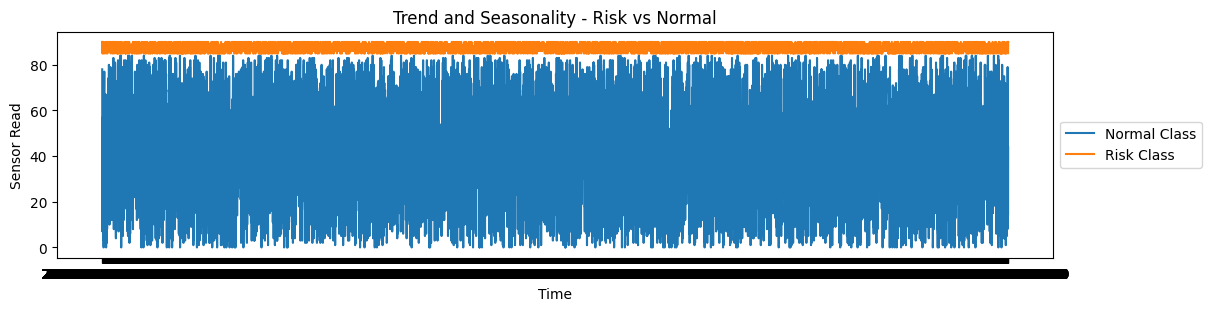

In [17]:
plot_trend_seasonality(train_df, 'dt_str', 'train_full_date_value', limit_records=10000)

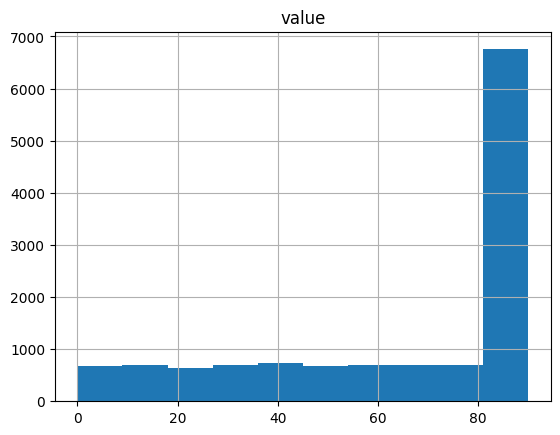

In [18]:
plot_histogram(train_df, 'dt_str')

In [19]:
ts_train = extract_mean_variance(train_df)

Mean 1 = 64.852469
Mean 2 = 64.603704
Variance 1 = 809.829469
Variance 2 = 823.985850


In [20]:
# O valor do teste indica que os dados são estactionários mesmo, 
# o que habilita usar modelos estatisticos para classificação
test_stationarity(ts_train)

Results of Dickey-Fuller Test:
ADF Statistic: -2.420694
p-value: 0.135981
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


##### 1.1.2 Dataset with month-day-hour, and value

In [21]:
train_df = prc_data.load_dataset_to_pandas('noise_train_month_day_hour_value')
train_df['month_day_hour'] = train_df.apply(lambda row: "{}.{}.{}".format(row['dt_month'],row['dt_day'],
                                                                          row['dt_hour']), axis=1)

In [22]:
train_df.head(2)

,id,dt_month,dt_day,dt_hour,subset_type,value,data_class,month_day_hour
0,1,1,1,11,train,90.0,risk,1.1.11
1,1,1,1,11,train,87.0,risk,1.1.11


Dataset type: train_month_day_hour, Total Records to analysis: 10000


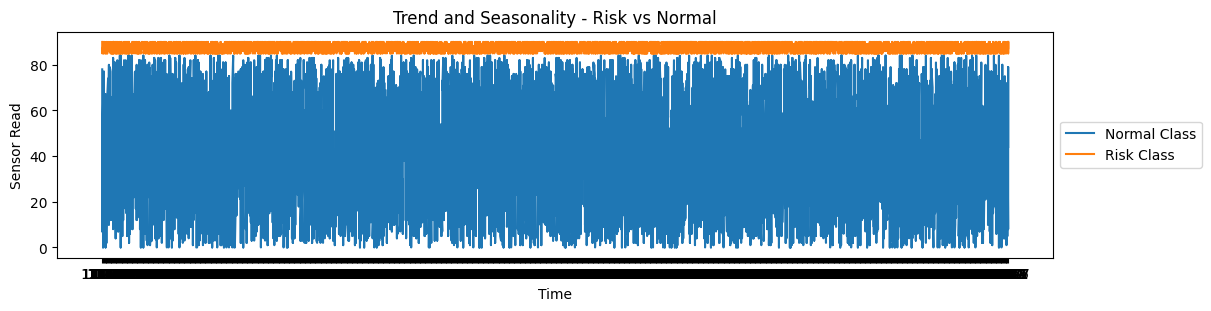

In [23]:
plot_trend_seasonality(train_df, 'month_day_hour', 'train_month_day_hour', limit_records=10000)

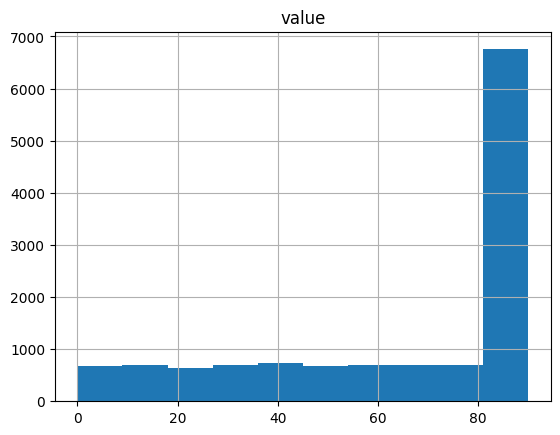

In [24]:
plot_histogram(train_df, 'month_day_hour')

In [25]:
ts_train = extract_mean_variance(train_df)

Mean 1 = 64.852469
Mean 2 = 64.603704
Variance 1 = 809.829469
Variance 2 = 823.985850


In [26]:
test_stationarity(ts_train)

Results of Dickey-Fuller Test:
ADF Statistic: -2.420694
p-value: 0.135981
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


##### 1.1.3 Dataset with month-hour, and value

In [27]:
train_df = prc_data.load_dataset_to_pandas('noise_train_month_hour_value')
train_df['month_hour'] = train_df.apply(lambda row: "{}.{}".format(row['dt_month'],row['dt_hour']), axis=1)

In [28]:
train_df.head(2)

,id,dt_month,dt_hour,subset_type,value,data_class,month_hour
0,1,1,11,train,90.0,risk,1.11
1,1,1,11,train,87.0,risk,1.11


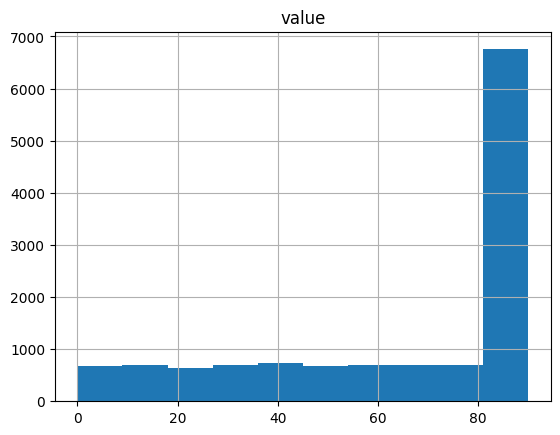

In [29]:
plot_histogram(train_df, 'month_hour')

Dataset type: train_full_date_value, Total Records to analysis: 10000


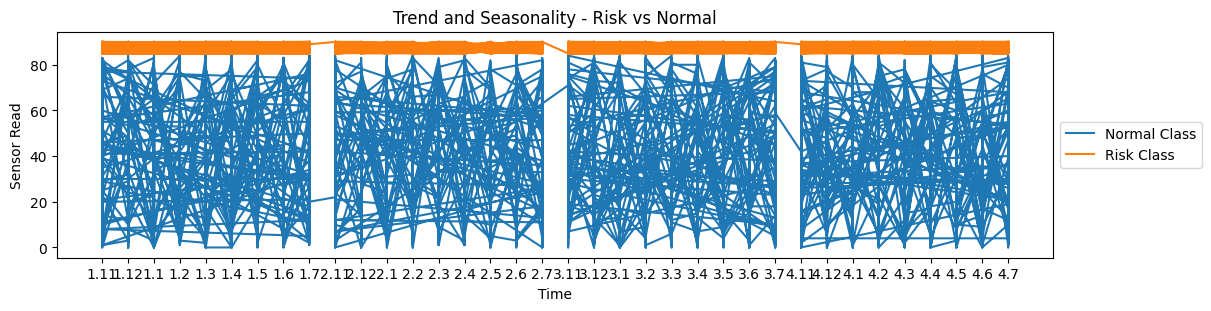

In [30]:
plot_trend_seasonality(train_df, 'month_hour', 'train_full_date_value', limit_records=10000)

In [31]:
ts_train = extract_mean_variance(train_df)

Mean 1 = 64.852469
Mean 2 = 64.603704
Variance 1 = 809.829469
Variance 2 = 823.985850


In [32]:
test_stationarity(ts_train)

Results of Dickey-Fuller Test:
ADF Statistic: -2.420694
p-value: 0.135981
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Para as diferentes quebras, p-value = 0.135 > 0.05: Falha ao rejeitar a hipótese nula (H0), 
os dados têm raiz unitária e não são estacionários, logo não pode usar modelos estatísticos para predição/classificação.